# CNN Enhancement Model

## Data Acquisition


(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)
(150, 130)

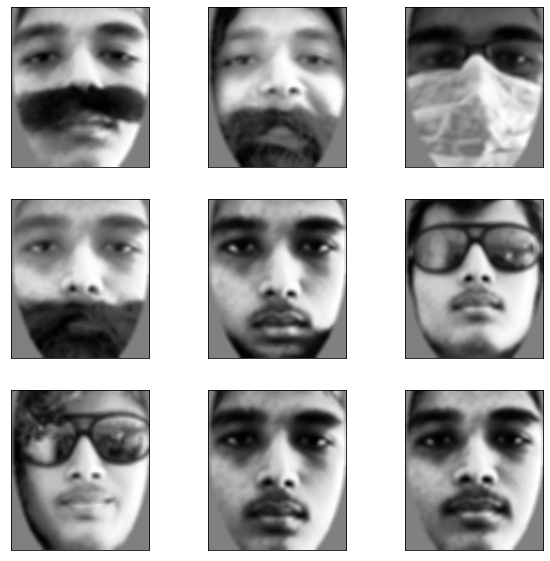

In [12]:
import numpy as np
import os
import cv2

def noisy(noise_typ, image):

    if noise_typ == "gauss":
        row,col = image.shape
        mean = 0
        #var = 0.1
       #sigma = var**0.5
        gauss = np.random.normal(mean,1,(row,col))
        gauss = gauss.reshape(row,col)
        noisy = image + gauss
        return noisy
    
    elif noise_typ == "s&p":
        row,col = image.shape
        s_vs_p = 0.5
        amount = 0.004
        out = image
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
                  for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
                  for i in image.shape]
        out[coords] = 0
        return out


import glob 
import matplotlib.pyplot as plt

samples_g = []
for i in glob.glob('../input/dasatset-1/Visible_cropped/*/*'):
    a = cv2.imread(i,-1)
    a = (a - a.min())/(a.max()-a.min())
    a = cv2.GaussianBlur(a,(5,5),cv2.BORDER_DEFAULT)
    print(a.shape)
    samples_g.append(a)
np.random.shuffle(np.array(samples_g))
plt.figure(figsize=(10,10))
plt.figure(1)

for j in range(1,10):
    plt.subplot(3,3,j)
    plt.imshow(samples_g[j])
    plt.xticks([])
    plt.yticks([])
    plt.gray()

plt.show()


## Model

In [38]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(100, 100, 1))  # adapt this if using `channels_first` image data format


x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
# x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(1, (3, 3), activation='relu', padding='same')(x)
# encoded = MaxPooling2D((2, 2), padding='same')(x)
autoencoder = Model(input_img, x)
autoencoder.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 100, 100, 64)      640       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 100, 100, 64)      36928     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 100, 100, 64)      36928     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 100, 100, 64)      36928     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 100, 100, 64)      36928     
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 100, 100, 64)     

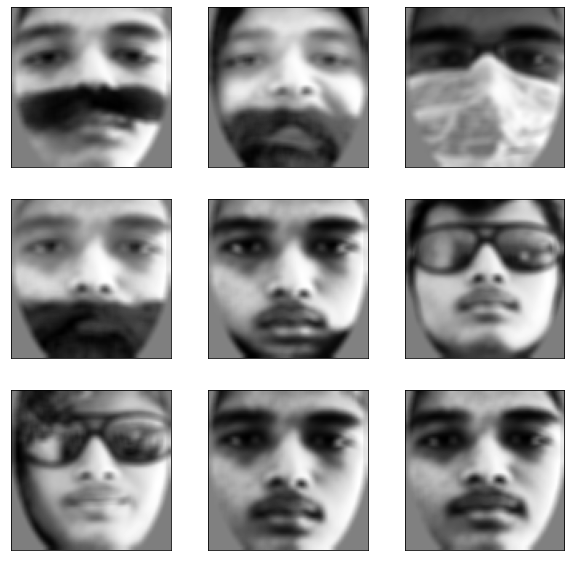

In [17]:
samples_CNN_g = []
for i in glob.glob('../input/dasatset-1/Visible_cropped/*/*'):
    a = cv2.imread(i,-1)
    a = cv2.resize(a,(100,100))
    a = (a - a.min())/(a.max()-a.min())
    a = cv2.GaussianBlur(a,(5,5),cv2.BORDER_DEFAULT)
    samples_CNN_g.append(a)

plt.figure(figsize=(10,10))
plt.figure(1)

for j in range(1,10):
    plt.subplot(3,3,j)
    plt.imshow(samples_CNN_g[j])
    plt.xticks([])
    plt.yticks([])
    plt.gray()

plt.show()

## Training and Prediction

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(samples_CNN_g, samples_CNN_g, test_size=0.25, random_state=42)
np.array(X_train).shape, np.array(X_test).shape

autoencoder.compile(optimizer='adamax', loss='mse')
autoencoder.fit(np.expand_dims(np.array(X_train),axis = -1), np.expand_dims(np.array(y_train),axis = -1), epochs = 50)

Epoch 1/50
16/16 [==============================] - 3s 170ms/step - loss: 0.1424
Epoch 2/50
16/16 [==============================] - 3s 169ms/step - loss: 0.0191
Epoch 3/50
16/16 [==============================] - 3s 169ms/step - loss: 0.0037
Epoch 4/50
16/16 [==============================] - 3s 169ms/step - loss: 0.0013
Epoch 5/50
16/16 [==============================] - 3s 170ms/step - loss: 6.6171e-04
Epoch 6/50
16/16 [==============================] - 3s 170ms/step - loss: 3.7437e-04
Epoch 7/50
16/16 [==============================] - 3s 169ms/step - loss: 2.3200e-04
Epoch 8/50
16/16 [==============================] - 3s 169ms/step - loss: 1.6335e-04
Epoch 9/50
16/16 [==============================] - 3s 169ms/step - loss: 1.2453e-04
Epoch 10/50
16/16 [==============================] - 3s 170ms/step - loss: 9.9929e-05
Epoch 11/50
16/16 [==============================] - 3s 168ms/step - loss: 8.3135e-05
Epoch 12/50
16/16 [==============================] - 3s 168ms/step - loss: 7.10

<Figure size 432x288 with 0 Axes>

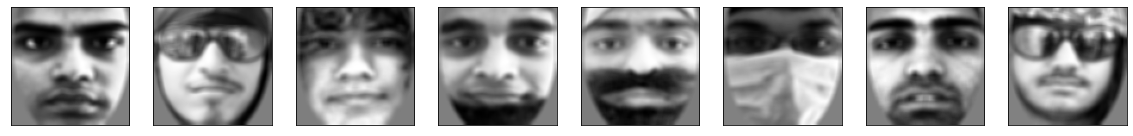

<Figure size 432x288 with 0 Axes>

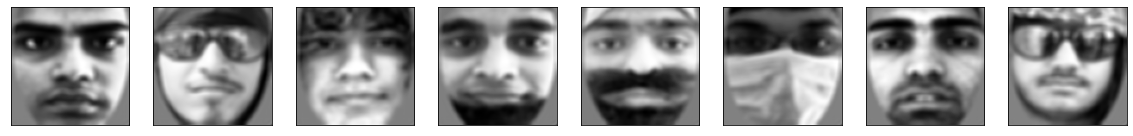

In [21]:
from scipy.ndimage import gaussian_filter


pred_CNN = autoencoder.predict(np.array(X_test))

# Output
plt.figure(1)
plt.figure(figsize = (20,20))
for i in range(1,9):
    plt.subplot(2,8,i)
    plt.imshow(X_test[i].reshape((100,100)))
    plt.xticks([])
    plt.yticks([])  
plt.show()

plt.figure(2)
plt.figure(figsize = (20,20))
for i in range(1,9):
    plt.subplot(1,8,i)
    plt.imshow(pred_CNN[i].reshape((100,100)))
    plt.xticks([])
    plt.yticks([])     
plt.show()

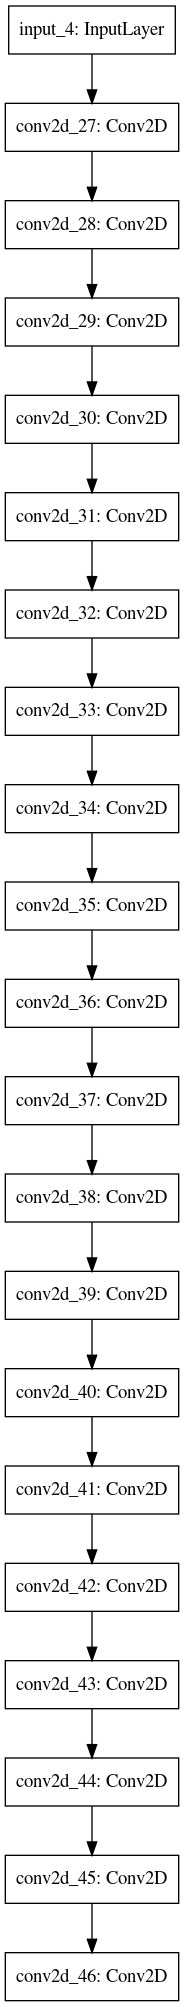

In [41]:
from keras.utils.vis_utils import plot_model

plot_model(autoencoder)

# Autoencoder

In [22]:
import numpy as np
import os
import cv2

def noisy(noise_typ, image):

    if noise_typ == "gauss":
        row,col = image.shape
        mean = 0
        #var = 0.1
       #sigma = var**0.5
        gauss = np.random.normal(mean,1,(row,col))
        gauss = gauss.reshape(row,col)
        noisy = image + gauss
        return noisy
    
    elif noise_typ == "s&p":
        row,col = image.shape
        s_vs_p = 0.5
        amount = 0.004
        out = image
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
                  for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
                  for i in image.shape]
        out[coords] = 0
        return out


## Data Acquisition

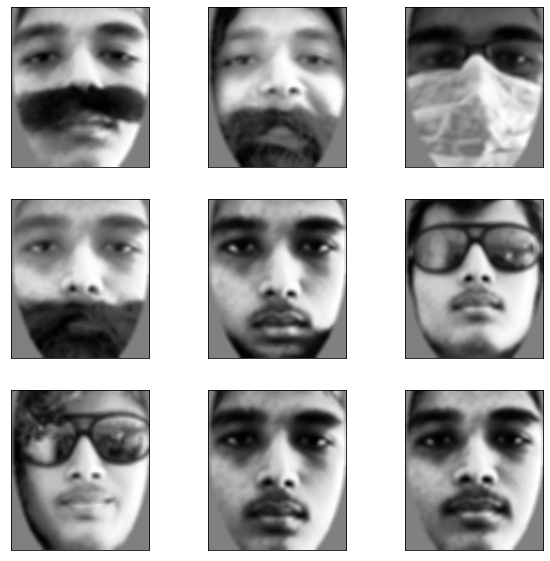

In [24]:
import glob 
import matplotlib.pyplot as plt

samples_g = []
for i in glob.glob('../input/dasatset-1/Visible_cropped/*/*'):
    a = cv2.imread(i,-1)
    a = (a - a.min())/(a.max()-a.min())
    a = cv2.GaussianBlur(a,(5,5),cv2.BORDER_DEFAULT)
    samples_g.append(a)
np.random.shuffle(np.array(samples_g))
plt.figure(figsize=(10,10))
plt.figure(1)

for j in range(1,10):
    plt.subplot(3,3,j)
    plt.imshow(samples_g[j])
    plt.xticks([])
    plt.yticks([])
    plt.gray()

plt.show()


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(samples_g, samples_g, test_size=0.33, random_state=42)

## Model Training and testing

In [26]:
import tensorflow as tf
import numpy as np
import keras
from keras.layers import Input,Dense
# from keras.layer.models import Model

inp1 = Input(shape=(samples_g[1].shape[0]* samples_g[1].shape[1]))
inp = Dense(2000, activation = 'relu')(inp1)
inp = Dense(1000, activation = 'relu')(inp)
inp = Dense(500, activation = 'relu')(inp)
inp = Dense(250, activation = 'relu')(inp)
inp = Dense(500, activation = 'relu')(inp)
inp = Dense(1000, activation = 'relu')(inp)
inp = Dense(2000, activation = 'relu')(inp)
out = Dense(150*130)(inp)
model = tf.keras.Model(inputs=[inp1], outputs=[out])
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 19500)]           0         
_________________________________________________________________
dense (Dense)                (None, 2000)              39002000  
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_3 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_4 (Dense)              (None, 500)               125500    
_________________________________________________________________
dense_5 (Dense)              (None, 1000)             

### Salt n Pepper Noise

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(samples_g, samples_g, test_size=0.33, random_state=42)
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = opt, loss= 'mse')
model.fit(np.array(X_train).reshape((456,150*130,1)), np.array(y_train).reshape((456,150*130,1)), epochs = 80)

Epoch 1/80
15/15 [==============================] - 0s 12ms/step - loss: 0.1635
Epoch 2/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0505
Epoch 3/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0458
Epoch 4/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0443
Epoch 5/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0405
Epoch 6/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0354
Epoch 7/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0323
Epoch 8/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0297
Epoch 9/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0270
Epoch 10/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0238
Epoch 11/80
15/15 [==============================] - 0s 11ms/step - loss: 0.0216
Epoch 12/80
15/15 [==============================] - 0s 12ms/step - loss: 0.0207
Epoch 13/80
15/15 [==================

<Figure size 432x288 with 0 Axes>

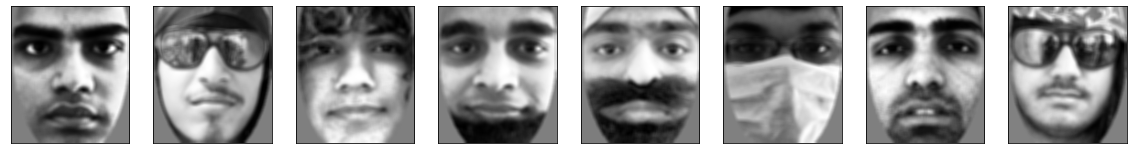

<Figure size 432x288 with 0 Axes>

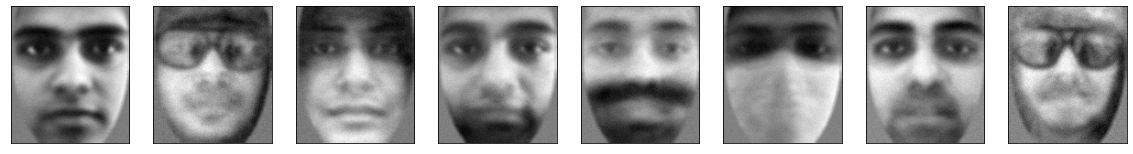

In [28]:
pred = model.predict(np.array(X_test).reshape((len(X_test),150*130,1)))

plt.figure(1)
plt.figure(figsize = (20,20))
for i in range(1,9):
    plt.subplot(2,8,i)
    plt.imshow(np.array(X_test).reshape((len(X_test),150*130,1))[i].reshape((150,130)))
    plt.xticks([])
    plt.yticks([])  
plt.show()

plt.figure(2)
plt.figure(figsize = (20,20))
for i in range(1,9):
    plt.subplot(1,8,i)
    plt.imshow(pred[i].reshape((150,130)))
    plt.xticks([])
    plt.yticks([])     
plt.show()

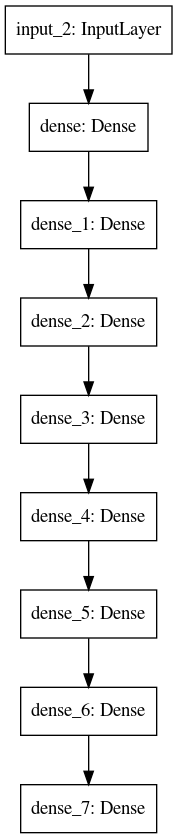

In [37]:
from keras.utils.vis_utils import plot_model

plot_model(model)

# CNN based AutoEncoder

In [33]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(100, 100, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 100, 100, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 50, 50, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 8)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 25, 25, 8)         584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 8)        

In [34]:
# tf.keras.losses.CategoricalCrossentropy(
#     from_logits=False, label_smoothing=0, reduction=losses_utils.ReductionV2.AUTO,
#     name='categorical_crossentropy'
# )
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(samples_CNN_g, samples_CNN_g, test_size=0.25, random_state=42)
np.array(X_train).shape, np.array(X_test).shape

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(np.expand_dims(np.array(X_train),axis = -1), np.expand_dims(np.array(y_train),axis = -1), epochs = 50)


Epoch 1/50
16/16 [==============================] - 0s 14ms/step - loss: 0.0563
Epoch 2/50
16/16 [==============================] - 0s 8ms/step - loss: 0.0233
Epoch 3/50
16/16 [==============================] - 0s 7ms/step - loss: 0.0131
Epoch 4/50
16/16 [==============================] - 0s 7ms/step - loss: 0.0111
Epoch 5/50
16/16 [==============================] - 0s 7ms/step - loss: 0.0101
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 0.0091
Epoch 7/50
16/16 [==============================] - 0s 7ms/step - loss: 0.0081
Epoch 8/50
16/16 [==============================] - 0s 7ms/step - loss: 0.0072
Epoch 9/50
16/16 [==============================] - 0s 7ms/step - loss: 0.0064
Epoch 10/50
16/16 [==============================] - 0s 7ms/step - loss: 0.0060
Epoch 11/50
16/16 [==============================] - 0s 7ms/step - loss: 0.0056
Epoch 12/50
16/16 [==============================] - 0s 7ms/step - loss: 0.0053
Epoch 13/50
16/16 [=============================

<Figure size 432x288 with 0 Axes>

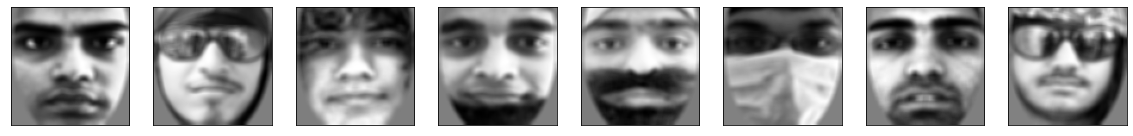

<Figure size 432x288 with 0 Axes>

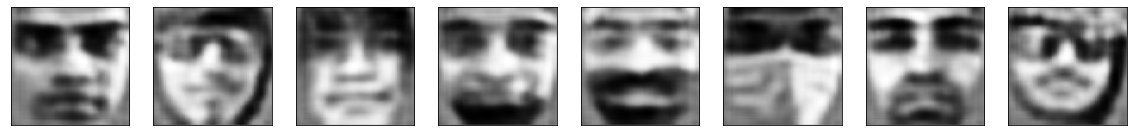

In [35]:
from scipy.ndimage import gaussian_filter


pred_CNN = autoencoder.predict(np.array(X_test))

# Output
plt.figure(1)
plt.figure(figsize = (20,20))
for i in range(1,9):
    plt.subplot(2,8,i)
    plt.imshow(X_test[i].reshape((100,100)))
    plt.xticks([])
    plt.yticks([])  
plt.show()

plt.figure(2)
plt.figure(figsize = (20,20))
for i in range(1,9):
    plt.subplot(1,8,i)
    plt.imshow(pred_CNN[i].reshape((100,100)))
    plt.xticks([])
    plt.yticks([])     
plt.show()

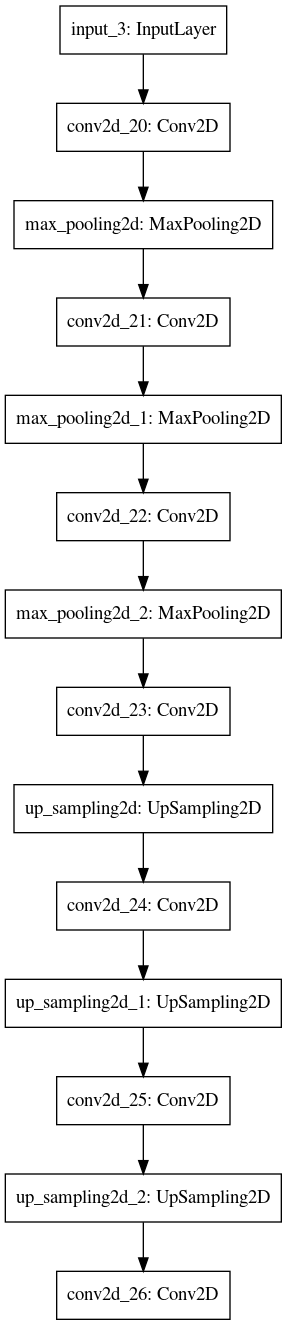

In [36]:
from keras.utils.vis_utils import plot_model

plot_model(autoencoder)